# Question 1

### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions. 

## Business Problem

#### Whether there is any significant difference in the diameter of the cutlet between two units.

#### Given
     α == 0.05(95% Confidence)

### NULL HYPOTHESIS = Y1 and Y2 are Normal

### ALTERNATE HYPOTHESIS = Y1 and y2 are not Normal

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
α = 0.05 # 95% Confidence

In [3]:
cutlets = pd.read_csv('D:/execlr/Assignments/Assignment 3/Cutlets.csv')
cutlets.head(10)

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


In [4]:
cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


### Checking for null values

In [5]:
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

### Checking for data types

In [6]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
df =  pd.Series(cutlets.iloc[:,0])
df

0     6.8090
1     6.4376
2     6.9157
3     7.3012
4     7.4488
5     7.3871
6     6.8755
7     7.0621
8     6.6840
9     6.8236
10    7.3930
11    7.5169
12    6.9246
13    6.9256
14    6.5797
15    6.8394
16    6.5970
17    7.2705
18    7.2828
19    7.3495
20    6.9438
21    7.1560
22    6.5341
23    7.2854
24    6.9952
25    6.8568
26    7.2163
27    6.6801
28    6.9431
29    7.0852
30    6.7794
31    7.2783
32    7.1561
33    7.3943
34    6.9405
Name: Unit A, dtype: float64

In [8]:
df1 = pd.Series(cutlets.iloc[:,1])
df1

0     6.7703
1     7.5093
2     6.7300
3     6.7878
4     7.1522
5     6.8110
6     7.2212
7     6.6606
8     7.2402
9     7.0503
10    6.8810
11    7.4059
12    6.7652
13    6.0380
14    7.1581
15    7.0240
16    6.6672
17    7.4314
18    7.3070
19    6.7478
20    6.8889
21    7.4220
22    6.5217
23    7.1688
24    6.7594
25    6.9399
26    7.0133
27    6.9182
28    6.3346
29    7.5459
30    7.0992
31    7.1180
32    6.6965
33    6.5780
34    7.3875
Name: Unit B, dtype: float64

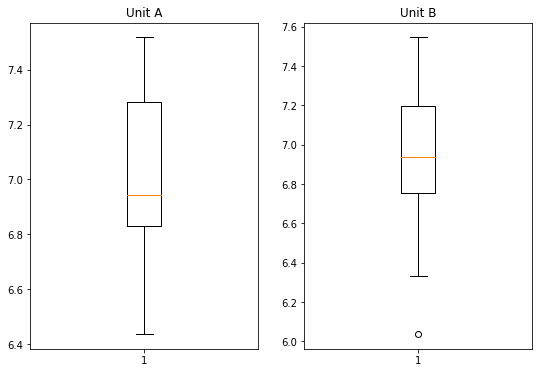

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')
plt.subplot(122)
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

### Two Tail test

In [10]:
# 2-sample 2-tail ttest:   stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(df,df1)
p_value

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

In [11]:
print( 'P Value of the paired T test is',p_value[1])

P Value of the paired T test is 0.4722394724599501


In [12]:
 if p_value[1] > α :
    print('We failed to reject Null Hypothesis because of lack of evidence')
else:
        print( ' we reject Null Hypothesis')
    

We failed to reject Null Hypothesis because of lack of evidence


# Question 2


### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
   
### Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.
 

In [13]:
labdata =pd.read_csv('D:/execlr/Assignments/Assignment 3/LabTAT.csv')
labdata.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [14]:
labdata.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [15]:
labdata.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

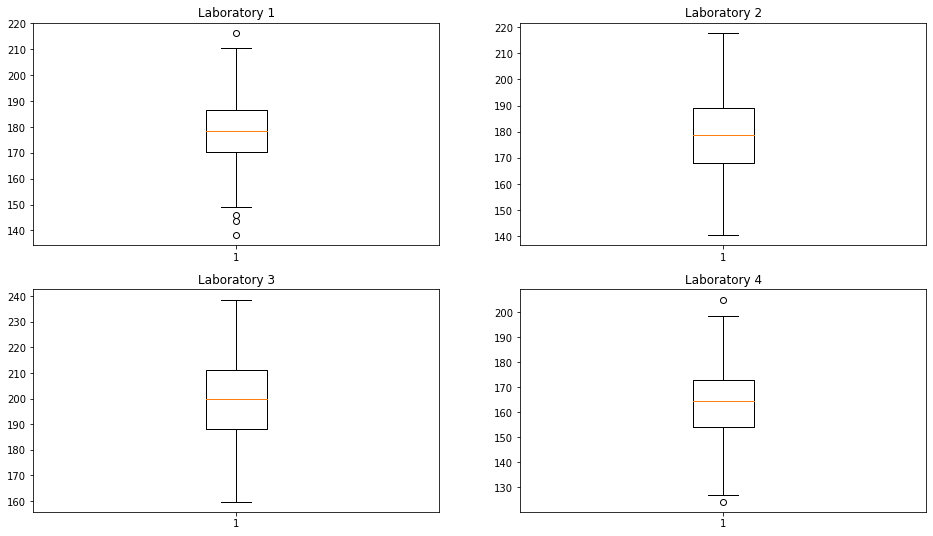

In [16]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(labdata['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(labdata['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(labdata['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(labdata['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

## Null Hypothesis:  μ1=μ2=μ3=μ4(Mean TAT for 4 laboratories equal)
## Alternate Hypothesis:  μ1≠μ2≠μ3≠μ4(Atleast one of them is Different)

### Significance = 5%
### α = 0.05

### ANOVA TEST

In [17]:
α = 0.05
p_value2=stats.f_oneway(labdata.iloc[:,0],labdata.iloc[:,1],labdata.iloc[:,2],labdata.iloc[:,3])
print('P Value= ',p_value2[1])

P Value=  2.1156708949992414e-57


In [18]:
 if p_value2[1] > α :
    print('We failed to reject Null Hypothesis because of lack of evidence')
else:
        print(' we reject Null Hypothesis')

 we reject Null Hypothesis


## Question 3

##       Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

### Null Hypothesis: All proportions are Equal
### Alternate Hypothesis: Not all proportions are equal

#### 1.Check p-value
#### 2.If p-value< alpha, we reject Null Hypothesis

In [19]:
buyratio = pd.read_csv('D:/execlr/Assignments/Assignment 3/BuyerRatio.csv')
buyratio

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [20]:
buyratio.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


#### Since there are more than 2 variable we have to perform Chi-Square test

In [21]:
# Chi2 contengency independence test
# # Output of  Chi2 contengency independence test (Chi2 stats value, p_value, df, expected obsvations)

In [22]:
Ch1 = stats.chi2_contingency([buyratio["East"], buyratio["West"], buyratio["North"], buyratio["South"]])
Ch1

(1.5959455386610577,
 0.6603094907091882,
 3,
 array([[  42.76531299,  442.23468701],
        [ 146.81287862, 1518.18712138],
        [ 131.11756787, 1355.88243213],
        [  72.30424052,  747.69575948]]))

In [23]:
p_value3 =Ch1[1]
p_value3

0.6603094907091882

In [24]:
 if p_value3 > α :
    print('We failed to reject Null Hypothesis because of lack of evidence')
else:
        print(' we reject Null Hypothesis')

We failed to reject Null Hypothesis because of lack of evidence


## Question 4
### TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.

### Business Problem
#### Does the defective % varies significantly by centre ?
### Data Description
#### Null Hypothesis: Customer order forms defective % does not varies by centre.
#### Alternative Hypthosis: Customer order forms defective % varies by centre.

In [25]:
Customer = pd.read_csv('D:/execlr/Assignments/Assignment 3/Costomer+OrderForm.csv')
Customer.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [26]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [27]:
Customer.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [28]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [29]:
Customer.Phillippines.value_counts()

Error Free    271
Defective      29
Name: Phillippines, dtype: int64

In [30]:
Customer.Indonesia.value_counts()

Error Free    267
Defective      33
Name: Indonesia, dtype: int64

In [31]:
Customer.India.value_counts()

Error Free    280
Defective      20
Name: India, dtype: int64

In [32]:
Customer.Malta.value_counts()

Error Free    269
Defective      31
Name: Malta, dtype: int64

In [33]:
Order = np.array([[271,267,269,280],[29,33,31,20]])
Order

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [34]:
Ch2 = stats.chi2_contingency(Order)
Ch2

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [35]:
p_value4 = Ch2[1]
p_value4

0.2771020991233135

In [36]:
 if p_value4 > α :
    print('We failed to reject Null Hypothesis because of lack of evidence')
else:
        print(' we reject Null Hypothesis')

We failed to reject Null Hypothesis because of lack of evidence
